In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))

from pydicom.data import get_testdata_file
from pipeline.dicom_io import dicom_to_tensor
from pipeline import preprocess as pp
import matplotlib.pyplot as plt
import torch

In [3]:
path = get_testdata_file("CT_small.dcm")
timg, ds = dicom_to_tensor(path, window_center=40, window_width=400, device="cpu")
print("tensor:", timg.shape, timg.min().item(), timg.max().item())

tensor: torch.Size([1, 1, 128, 128]) 0.0 1.0


In [4]:
img_np = timg[0,0].numpy()

enh = pp.enhance_pipeline(
    img_np,
    denoise="bilateral",
    denoise_params={"d": 7, "sigma_color": 35.0, "sigma_space": 3.0},
    do_clahe=True,
    clahe_params={"clip_limit": 2.0, "tile_grid_size": (8,8)},
    do_unsharp=True,
    unsharp_params={"ksize": 3, "sigma": 0.0, "amount": 0.8},
    do_clip=True,
    clip_params={"low_q": 0.005, "high_q": 0.995},
    do_gamma=False,
)

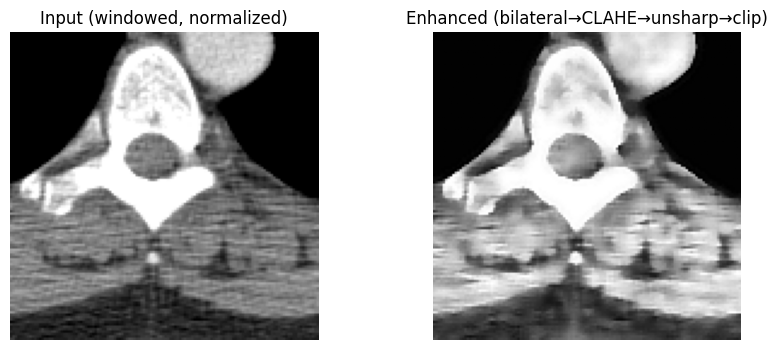

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(img_np, cmap="gray"); ax[0].set_title("Input (windowed, normalized)"); ax[0].axis("off")
ax[1].imshow(enh,   cmap="gray"); ax[1].set_title("Enhanced (bilateral→CLAHE→unsharp→clip)"); ax[1].axis("off")
plt.show()

In [6]:
img_np = timg[0,0].numpy()

enh = pp.enhance_pipeline(
    img_np,
    denoise="bilateral",
    denoise_params={"d": 7, "sigma_color": 35.0, "sigma_space": 3.0},
    do_clahe=False,
    do_triton_clahe=True,
    clahe_params={"clip_limit": 2.0, "tile_grid_size": (8,8)},
    do_unsharp=True,
    unsharp_params={"ksize": 3, "sigma": 0.0, "amount": 0.8},
    do_clip=True,
    clip_params={"low_q": 0.005, "high_q": 0.995},
    do_gamma=False,
)

AttributeError: 'numpy.ndarray' object has no attribute 'is_cuda'